In [79]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [80]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [85]:
#train & test 데이터 생성
train_datagen = ImageDataGenerator(
    rescale=1/255, #데이터 정규화
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.2,1.0],
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1/255, #데이터 정규화
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.2,1.0],
    horizontal_flip=True) 

training_set = train_datagen.flow_from_directory(
    './dataset/train',
    target_size=(256, 256),
    batch_size=4,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    './dataset/test',
    target_size=(256, 256),
    batch_size=3,
    class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#     './dataset/validation',
#     target_size=(256, 256),
#     batch_size=3,
#     class_mode='binary')

Found 50 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [90]:
hist = model.fit_generator(
    training_set,
    steps_per_epoch = 13,
    epochs= 10 ,
    validation_data = test_set,
    validation_steps = 7)

Epoch 1/10
13/13 [==============================] - 3s 259ms/step - loss: 0.0188 - acc: 1.0000 - val_loss: 0.4485 - val_acc: 0.8571
Epoch 2/10
13/13 [==============================] - 3s 267ms/step - loss: 0.0175 - acc: 1.0000 - val_loss: 0.9707 - val_acc: 0.6667
Epoch 3/10
13/13 [==============================] - 3s 231ms/step - loss: 0.0114 - acc: 1.0000 - val_loss: 0.5278 - val_acc: 0.7619
Epoch 4/10
13/13 [==============================] - 3s 237ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.7018 - val_acc: 0.7619
Epoch 5/10
13/13 [==============================] - 3s 256ms/step - loss: 0.0258 - acc: 0.9807 - val_loss: 1.3941 - val_acc: 0.6667
Epoch 6/10
13/13 [==============================] - 3s 230ms/step - loss: 0.0271 - acc: 0.9807 - val_loss: 1.0795 - val_acc: 0.8571
Epoch 7/10
13/13 [==============================] - 3s 261ms/step - loss: 0.9005 - acc: 0.9229 - val_loss: 0.7177 - val_acc: 0.7619
Epoch 8/10
13/13 [==============================] - 3s 240ms/step - loss: 0.

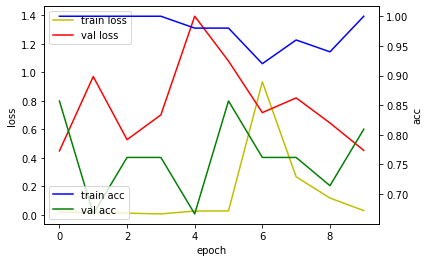

TypeError: data type not understood

In [91]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('acc')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

print(model)

#모델 저장
model.save('./model.h5')

In [98]:
def predict(test_path):
    test_datagen = ImageDataGenerator(rescale=1. / 255)
    test_set = test_datagen.flow_from_directory(test_path,
                                                        target_size=(256,256),
                                                        batch_size=3,
                                                        class_mode='binary')

    if model is not None:
        output = model.predict_generator(test_set, steps=1)
        return test_set.class_indices, output
    else:
        print('학습모델이 없습니다.')


In [99]:
predict('./dataset/test')

Found 21 images belonging to 2 classes.
